# Streetwise: Comparison of Perceived Safety

## Import the necessary libraries

In [26]:
import tensorflow
from tensorflow.keras.models import Model, Sequential, load_model
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
import cv2
import os
from IPython.display import display, Markdown, Latex

## Define some helper functions

In [40]:
def load_images(i1, i2): # Load and display images
    path = "../data/"

    im1 = cv2.imread(path+i1+".jpg")
    im2 = cv2.imread(path+i2+".jpg")

    im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
    im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

    im1t = cv2.resize(im1, (500, 500), interpolation=cv2.INTER_CUBIC)
    im2t = cv2.resize(im2, (500, 500), interpolation=cv2.INTER_CUBIC)

    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,10))
    ax1.imshow(im1t)
    ax1.axis('off')
    ax2.imshow(im2t)
    ax2.axis('off')
    plt.show()

    im1 = cv2.resize(im1, (224, 224), interpolation=cv2.INTER_CUBIC)
    im1 = preprocess_input(im1)

    im2 = cv2.resize(im2, (224, 224), interpolation=cv2.INTER_CUBIC)
    im2 = preprocess_input(im2)
    
    return im1, im2

def prediction_output(pred):
    if pred[0] > pred[1]:
        # return Markdown("> The scene in the **RIGHT** image is perceived as safer, probability: **"+str(int(pred[0]*100))+"%**")
        return Markdown("> Die Lage im **RECHTEN** Bild wird als sicherer empfunden, Prob: **"+str(int(pred[0]*100))+"%**")
    else:
        return Markdown("> Die Lage im **LINKEN** Bild wird als sicherer empfunden, Prob: **"+str(int(pred[1]*100))+"%**")

## Load the pre-trained neural network model

In [22]:
siamese_net = load_model("../models/Conv8MaxPool3x3B4lr0.002siameselayer1epo_then_augmentedx4lr0.000000120epochs.h5")

## Demo

### Laden von zwei zu vergleichenden Bildern

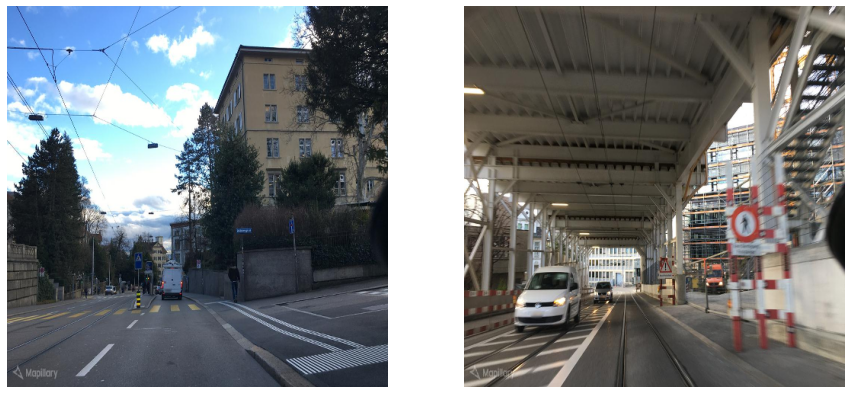

In [62]:
im1, im2 = load_images("img39", "img24")

### Auswertung der Frage "Welcher der dargestellten Orte sieht sicherer aus?"

In [63]:
res = siamese_net.predict([[im1], [im2]])[0]

display(prediction_output(res))

> Die Lage im **LINKEN** Bild wird als sicherer empfunden, Prob: **75%**

### Laden von zwei zu vergleichenden Bildern

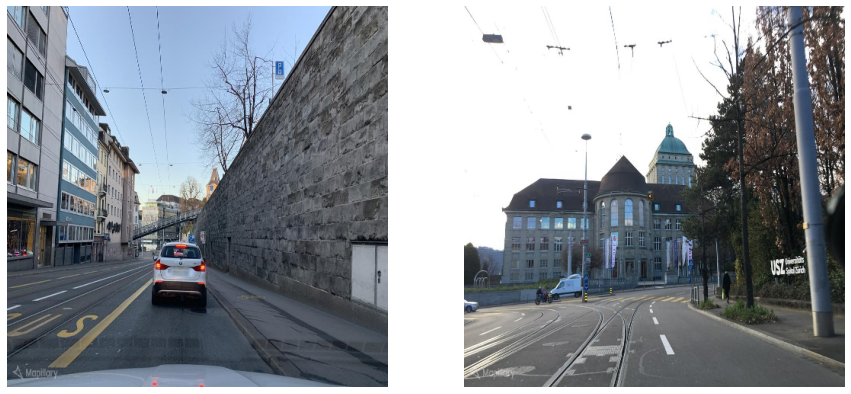

In [66]:
im1, im2 = load_images("img9", "img34")

### Auswertung der Frage "Welcher der dargestellten Orte sieht sicherer aus?"

In [67]:
res = siamese_net.predict([[im1], [im2]])[0]

display(prediction_output(res))

> Die Lage im **RECHTEN** Bild wird als sicherer empfunden, Prob: **70%**

### Laden von zwei zu vergleichenden Bildern

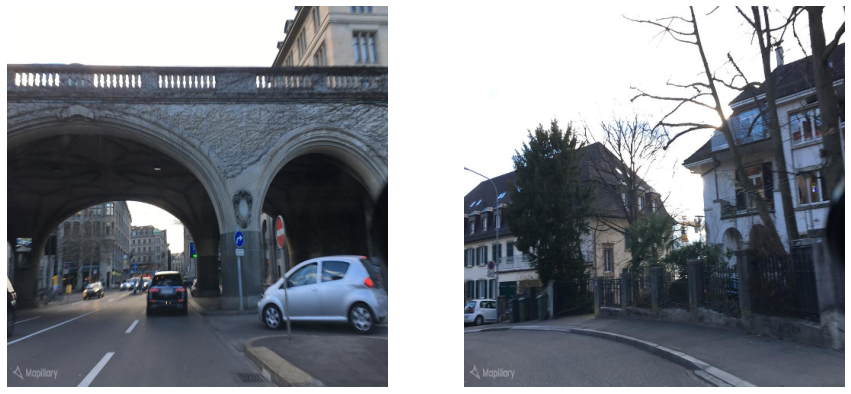

In [92]:
im1, im2 = load_images("img77", "img12")

### Auswertung der Frage "Welcher der dargestellten Orte sieht sicherer aus?"

In [93]:
res = siamese_net.predict([[im1], [im2]])[0]

display(prediction_output(res))

> Die Lage im **RECHTEN** Bild wird als sicherer empfunden, Prob: **84%**